In [10]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go

# Linear Model
from sklearn.linear_model import LogisticRegression

# Tree-Based Models
from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier # Boosting Technique
# import lightgbm as lgb            # Boosting Technique

# Distance-Based 
from sklearn.neighbors import KNeighborsClassifier

# Deep Learning Architecture
# from tensorflow import keras
# from tensorflow.keras import layers, callbacks

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import metrics

%matplotlib inline

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.shape

(303, 14)

## Data Labels

+ Age : Age of the patient

+ Sex : Sex of the patient

+ exang: exercise induced angina (1 = yes; 0 = no)

+ ca: number of major vessels (0-3)

+ cp : Chest Pain type chest pain type
    + Value 0: typical angina
    + Value 1: atypical angina
    + Value 2: non-anginal pain
    + Value 3: asymptomatic

+ trtbps : resting blood pressure (in mm Hg)

+ chol : cholestoral in mg/dl fetched via BMI sensor

+ fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

+ rest_ecg : resting electrocardiographic results
    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST  elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

+ thalach : maximum heart rate achieved

+ target : chance of heart attack
    + 0 = less chance of heart attack 
    + 1 = more chance of heart attack

In [4]:
data.output.values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [5]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

+ Correlation Heatmap

<Axes: >

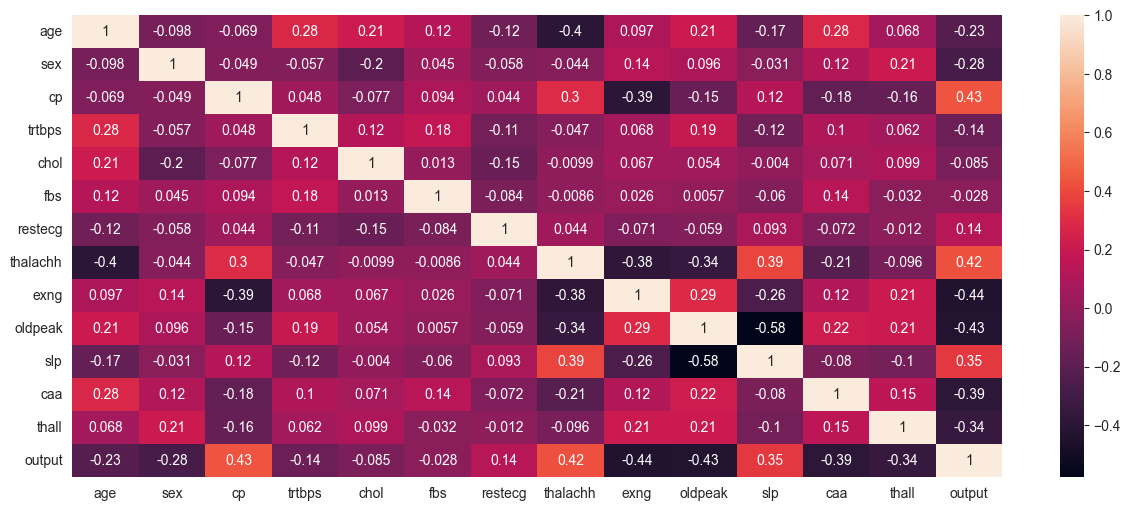

In [11]:
plt.figure(figsize=(15, 6))
sns.set_style('darkgrid')
sns.heatmap(data.corr(), annot=True)

+ Age Distribution

In [ ]:
# data['age'].plot(kind = 'hist')

In [12]:
ax = px.histogram(data, x='age', template='plotly_dark', color='output', title='Age Distribution')
ax.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
plt.figure(figsize=(15, 7))
sns.set_style('darkgrid')
sns.histplot(data.age, kde=True)

The Age column has a normal distribution, with most of the patients ranging between 50 and 65 years of age. Also, having a high chance of heart attack.

In [ ]:
ax = px.pie(data, names='output', template='plotly_dark', hole=0.5)
ax.show()

From the sample, about 54% of the patients had a high chance of heart attack.

+ Gender Distribution

In [ ]:
ax = px.pie(data, names='sex', template='plotly_dark', hole=0.5)
ax.show()

From the dataset, 68.3% of the patients are of type 1 sex and 31.7% are of type 0

+ Chest Pain Types

In [ ]:
ax = px.pie(data, names = 'cp', template = 'plotly_dark', title = 'Chest Pain Types', hole = 0.4)
ax.show()

Majority of the patients 47.2% experience type 0 chest pain : typical angina. Followed by type 1 (28.7%) and type 2 (16.5%). Only about 7% experience type 3 (asymtomatic) chest pains.

+ Chance of Heart Attack based on Chest Pain Type

In [ ]:
ax = px.sunburst(data, names = 'cp', path=['output', 'cp'], template = 'plotly_dark', title = 'Chance of Heart Attack based on Chest Pain Type')
ax.show()

Majority of the patients with a high chance heart attack experience type 2 chest pain (atypical_angina). Followed by type 1 and type 0.
On the other hand, most of those with a lower chance of heart attack experience type 0 (typical angina).

+ Correlation between age and resting blood pressure

In [ ]:
ax = px.scatter(data, x = 'age', y = 'trtbps', size = 'trtbps', 
                color = 'output',
                template = 'plotly_dark', 
                size_max = 20,
                title = 'Correlation Between Age and Resting BP')
ax.show()

In [ ]:
sns.regplot(x = data.age, y = data['trtbps'])

Distirbution of resting bp and age (scatter) with chances of heart attack

In [ ]:
X = data.drop('output', axis = 1)

y = data.output

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.22, random_state = 23)

# Before Scaling

+ ### Logistic Regression

In [ ]:
model_lr = LogisticRegression(max_iter = 1000)
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
preds_lr = model_lr.predict(X_valid)

lr_acc = metrics.accuracy_score(preds_lr, y_valid)
lr_roc = metrics.roc_auc_score(preds_lr, y_valid)

# Accuracy
print('LogisticRegression')
print(f'> accuracy: {lr_acc}')
print(f'> auc_score: {lr_roc}')

LogisticRegression
> accuracy: 0.835820895522388
> auc_score: 0.8389292196007259


+ ### RandomForest

In [ ]:
model_rf = RandomForestClassifier(random_state = 23)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=23)

In [ ]:
preds_rf = model_rf.predict(X_valid)

rf_acc = metrics.accuracy_score(preds_rf, y_valid)
rf_roc = metrics.roc_auc_score(preds_rf, y_valid)

# Accuracy
print('RandomForest')
print(f'> accuracy: {rf_acc}')
print(f'> auc_score: {rf_roc}')

RandomForest
> accuracy: 0.835820895522388
> auc_score: 0.8389292196007259


+ ### XGB

In [ ]:
# model_xgb = XGBClassifier(use_label_encoder = False)
# model_xgb.fit(X_train, y_train,
#              early_stopping_rounds = 20,
#              eval_set = [(X_valid, y_valid)])

In [ ]:
# preds_xgb = model_xgb.predict(X_valid)

# acc_score_xgb = metrics.accuracy_score(preds_xgb, y_valid)
# print('XGBoost ')
# print(f'> Acc: {acc_score_xgb}')

In [ ]:
# preds_lr = model_lr.predict(X_valid)

# lr_acc = metrics.accuracy_score(preds_lr, y_valid)
# lr_roc = metrics.roc_auc_score(preds_lr, y_valid)

# # Accuracy
# print('LogisticRegression')
# print(f'> accuracy: {lr_acc}')
# print(f'> auc_score: {lr_roc}')

+ ### LightGBM

In [ ]:
params = {'num_leaves': 14, 'objective': 'binary', 'metrics':'auc'}
num_rounds = 1000

dtrain = lgb.Dataset(X_train, y_train)
dvalid = lgb.Dataset(X_valid, y_valid)

In [ ]:
# model_lgb = lgb.train(params, dtrain, num_rounds, valid_sets = [dvalid])

+ ### KNeighbors

In [ ]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
preds_knn = model_knn.predict(X_valid)

knn_acc = metrics.accuracy_score(preds_knn, y_valid)
knn_roc = metrics.roc_auc_score(preds_knn, y_valid)

# Accuracy
print('KNeighbors')
print(f'> accuracy: {knn_acc}')
print(f'> auc_score: {knn_roc}')

KNeighbors
> accuracy: 0.6865671641791045
> auc_score: 0.6879464285714286


+ ### Deep Neural Networks

In [ ]:
model_nn = keras.Sequential([
    layers.Dense(44, activation = 'relu', input_shape = [13]),
    layers.Dense(44, activation = 'relu'),
    layers.Dense(44, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')
])

model_nn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
early_stopping = callbacks.EarlyStopping(
        min_delta = 0.001, 
        patience = 20,
        restore_best_weights = True
)

In [ ]:
model_data = model_nn.fit(X_train, y_train, 
                         validation_data = (X_valid, y_valid),
                         batch_size = 24,
                         epochs = 1000,
                         callbacks = [early_stopping])

In [ ]:
history = pd.DataFrame(model_data.history)
history.plot()

In [ ]:
history.head()

In [ ]:
history.loc[3:, :].plot()

In [ ]:
print('Deep Learning')
print(f'> accuracy: {history.val_accuracy.max()}')

# After Scaling

In [ ]:
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_valid = pd.DataFrame(scaler.transform(X_valid), columns = X_valid.columns)

X_train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,-0.576744,0.695900,0.971597,-0.640425,-1.078171,-0.410264,0.839517,-0.517308,-0.689202,0.784503,-0.610430,2.349697,1.154809
1,0.077639,0.695900,-0.971597,0.480794,-0.518817,-0.410264,0.839517,-1.757645,1.450953,3.800400,-2.159479,-0.697163,1.154809
2,1.386405,0.695900,-0.971597,1.602012,0.812061,-0.410264,-1.047397,-1.890539,1.450953,0.365628,-0.610430,2.349697,-0.517184
3,-1.558319,0.695900,1.943193,0.480794,-0.866002,-0.410264,0.839517,1.210305,1.450953,0.281853,0.938619,-0.697163,1.154809
4,0.404830,-1.436988,0.971597,-0.640425,1.853617,-0.410264,0.839517,0.944518,-0.689202,-0.890996,0.938619,-0.697163,-0.517184


In [ ]:
def train_eval_model(X_train, y_train, X_valid, y_valid, model):
    print('Training and Evaluating the Model')
    print('*' * 30)
    
    if model == 'logisticregression':
        model = LogisticRegression()
        print('Training LogisticRegression')
        print('................')
        model.fit(X_train, y_train)
        print('Evaluating the model')
        print('.............')
        preds = model.predict(X_valid)
        acc = metrics.accuracy_score(preds, y_valid)
        roc = metrics.roc_auc_score(preds, y_valid)
        print(f'Accuracy > {acc}')
        print(f'ROC_AUC > {roc}')
    
    elif model == 'randomforest':
        model = RandomForestClassifier(random_state = 22)
        print('Training RandomForest Classifier')
        print('................')
        model.fit(X_train, y_train)
        print('Evaluating the model')
        print('.............')
        preds = model.predict(X_valid)
        acc = metrics.accuracy_score(preds, y_valid)
        roc = metrics.roc_auc_score(preds, y_valid)
        print(f'Accuracy > {acc}')
        print(f'ROC_AUC > {roc}')
        
    elif model == 'knn':
        model = KNeighborsClassifier()
        print('Training KNeighbors Classifier')
        print('................')
        model.fit(X_train, y_train)
        print('Evaluating the model')
        print('.............')
        preds = model.predict(X_valid)
        acc = metrics.accuracy_score(preds, y_valid)
        roc = metrics.roc_auc_score(preds, y_valid)
        print(f'Accuracy > {acc}')
        print(f'ROC_AUC > {roc}')
        
    elif model == 'deeplearning':
        print('Training Deep Neural Networks')
        print('.' * 30)
        model_nn = keras.Sequential([
            layers.Dense(44, activation = 'relu', input_shape = [13]),
            layers.Dense(44, activation = 'relu'),
            layers.Dense(44, activation = 'relu'),
            layers.Dense(1, activation = 'sigmoid')
        ])

        model_nn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
        
        early_stopping = callbacks.EarlyStopping(
            min_delta = 0.001, 
            patience = 20,
            restore_best_weights = True)
        
        model_data = model_nn.fit(X_train, y_train, 
                         validation_data = (X_valid, y_valid),
                         batch_size = 24,
                         epochs = 1000,
                         callbacks = [early_stopping],
                         verbose = 0)
        
        history = pd.DataFrame(model_data.history)
        history.plot()
        
        print(f'> Validation accuracy: {history.val_accuracy.max()}')
        
    else:
        print('Choose a valid model!!!')

In [ ]:
train_eval_model(X_train, y_train, X_valid, y_valid, 'logisticregression')

Training and Evaluating the Model
******************************
Training LogisticRegression
................
Evaluating the model
.............
Accuracy > 0.835820895522388
ROC_AUC > 0.8360215053763442


In [ ]:
train_eval_model(X_train, y_train, X_valid, y_valid, 'randomforest')

Training and Evaluating the Model
******************************
Training RandomForest Classifier
................
Evaluating the model
.............
Accuracy > 0.8059701492537313
ROC_AUC > 0.8060035842293907


In [ ]:
train_eval_model(X_train, y_train, X_valid, y_valid, 'knn')

Training and Evaluating the Model
******************************
Training KNeighbors Classifier
................
Evaluating the model
.............
Accuracy > 0.8656716417910447
ROC_AUC > 0.8660394265232976


In [ ]:
train_eval_model(X_train, y_train, X_valid, y_valid, 'deeplearning')